# Seaborn - Comparison plots

Ploturile de tip 'comparison plot' sunt defapt versiuni bi-dimensionale ale ploturilor pe care le-am învățat până în acest moment. Cele două ploturi principale despre care o să învățăm sunt:

    - joinplot()

    - pairplot()
    

Un plot de tip joinplot() este o combinație de mai multe scatterplots, iar în plus față de acestea se mai adaugă și o histogramă pentru a putea face diferența dintre cele două feateruri. Datele respective pot fi afișate fie sub formă de puncte (cum se creează în mod default un scatterplot), fie sub formă de hexagoane. Ce este diferit la aceste hegaxoane este că acestea devin tot mai închise la culoare cu cât există mai multe puncte într-o anumită zonă

Un plot de tipul 'pariplot' este destul de des întâlnit în domeniul de DataScience și de Machine Learning și reprezintă o metodă de a compara toate coloanele numerice din cadrul unui DataFrame. Automat creează o histogramă și un scatterplot pentru fiecare coloană pentru a vedea distribuția tuturor featerurilor numerice. În cazul unui set mare de date acest tip de plot poate să consume extrem de multe resurse de CPU și RAM, de aceea se recomandă să se filtreze datele înainte să se realizeze acest tip de plot. 

Să realizăm și ceva practic cu aceste noțiuni

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file into a DataFrame
df = pd.read_csv('../data/05-Seaborn/StudentsPerformance.csv')

In [4]:
# Printing the head of the DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Ce avem nevoie pentru a crea un plot de comparație utilizând un 'joinplot()' sunt două coloane de tip continuous, una pentru axa x și una pentru axa y. Acest tip de plot ne poate răspunde la întrebarea dacă există ceva relație între aceste date din coloanele respective, și dacă există, ce tip de relație există între aceste date

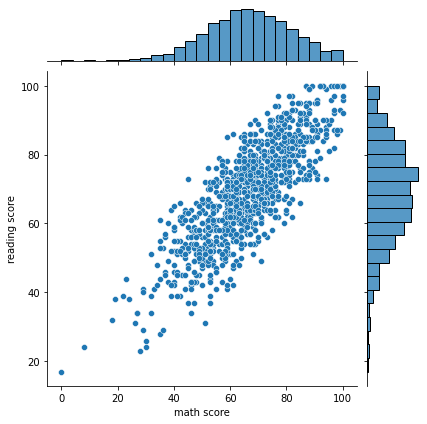

In [5]:
sns.jointplot(x='math score', y='reading score', data=df)

Ce anume se găsește în cadrul graficului de mai sus este un scatterplot combinat dintre cele două coloane împreună cu distribuția lor sub formă de histogramă. Din acest plot nu putem să ne dăm seama dacă sunt anumite puncte care se suprapun, și dacă sunt astfel de puncte care se suprapun, cât de multe sunt? Pentru asta putem să modificăm ceea ce este afișat în cadrul graficului, în loc de un scatterplot să ne afișeze un grid de hexagoane care să se facă tot mai închis la culoare în funcție de numărul de puncte care se suprapun. Pentru a schimba asta o să ne folosim de parametrul 'kind'. Default este setat la 'scatter', dar noi o să îl modificăm la 'hex'

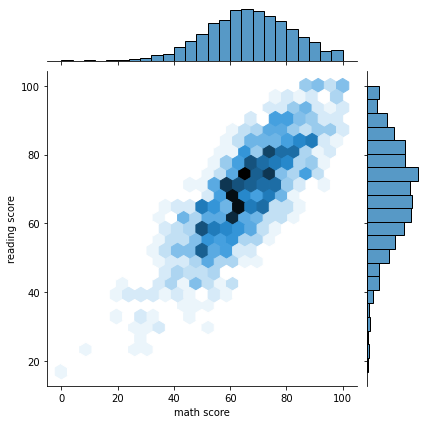

In [6]:
sns.jointplot(x='math score', y='reading score', data=df, kind='hex')

Ce este util la acest tip de plot este faptul că acesta poate funcționa împreună cu parametrul hue, prin care putem să diferențiem aceste date în funcție de o anumită coloană categorică

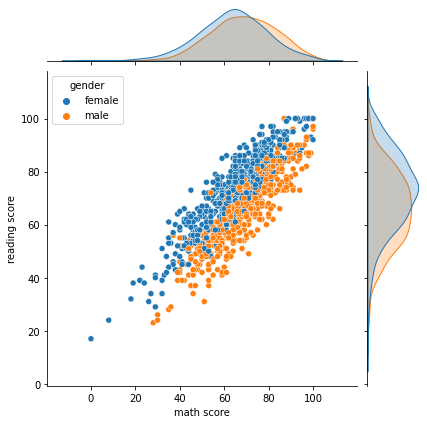

In [9]:
sns.jointplot(x='math score', y='reading score', data=df, hue='gender')

În momentul în care se utilizează și hue, din acest moment nu se mai creează histograme ci se afișează KDE-ul pentru fiecare categorie în parte

În continuare o să ne uităm peste pairplot(). După cum spuneam, trebuie avut grijă cu un astfel de plot deoarece aceasta poate consuma mult CPU și RAM dacă DataFrame-ul care se oferă este unul destul de mare. Din moment ce acest tip de plot creează legături între coloanele numerice, trebuie să îi ofeirm ca și argumente doar valoarea pentru parametrul 'data'

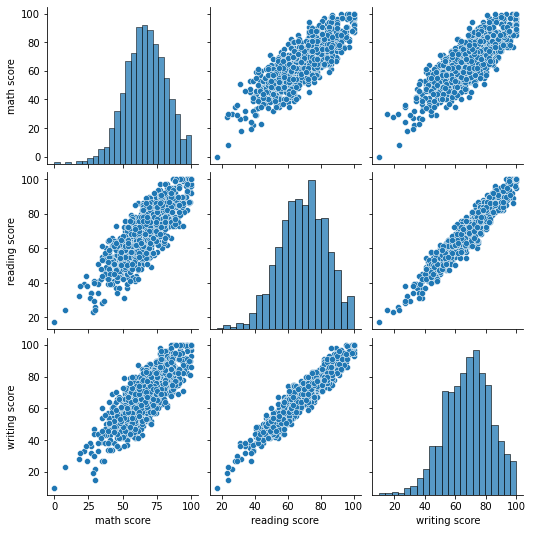

In [10]:
sns.pairplot(data=df)

Rezultatul acestui cod este un plot care este împărțit în mai multe subploturi. Pe diagonală avem histograma pentru fiecare coloană continuă numerică în parte, iar restul reprezintă relația dintre combinațiile diponibile între toate coloanele numerice din DataFrame. (practic face câte un joinplot() separat pentru fiecare caz în parte, math score vs. reading score, math score vs. writing score etc.) Deoarece face toate combinările posibile avem și grafice duplicate. math score vs. reading score este același grafic cu reading score vs. math score. Din acest motiv, ceea ce este pe diagonale este duplicat, prin urmare se poate renunța la tot ce este duplicat. Pentru a renunța la acestea tot ce trebuie să facem este să îi oferim parametrului 'corner' valoarea True

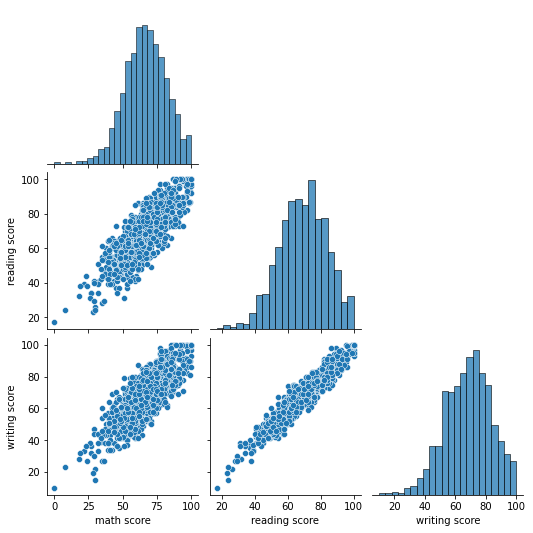

In [13]:
sns.pairplot(data=df, corner=True)

La fel ca și un joinplot(), și acest tip de plot acceptă parametrul 'hue' prin care putem să evidențiem datele în funcție de anumite categorii

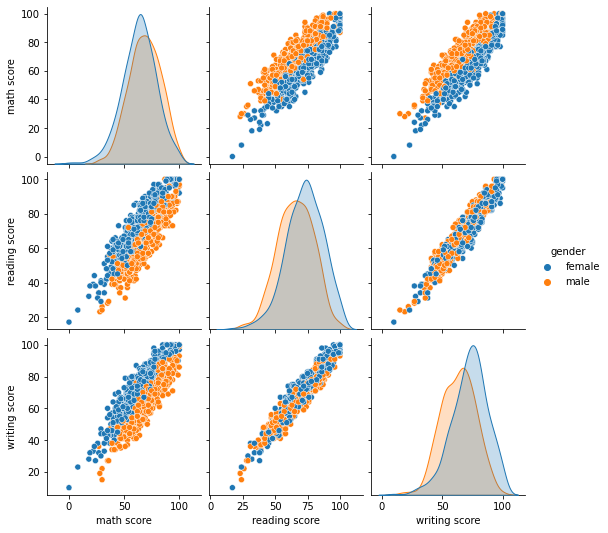

In [12]:
sns.pairplot(data=df, hue='gender')

La fel ca și al un joinplot() simplu, și aici se modifică din histogramă în KDE pentru a se putea diferenția mai bine datele în funcție de categorie

## Recapitulare

În cadrul acestui tutorial am învățat următoarele lucruri:

    1. Cum să creem un joinplot()

        sns.joinplot(x='math score', y='reading score', data=df)

    2. Cum să modificăm punctele ce sunt afișate astfel încât dintr-un scatterplot să se afișeze un grid de hexagoane

        sns.joinplot(x='math score', y='reading score', data=df, kind='hex')

    3. Faptul că un joinplot() acceptă și parametrul de hue (când se utilizează parametrul de hue nu se mai poate utiliza parametrul 'kind', iar histograma este înlocuită cu un KDE)

        sns.joinplot(x='math score', y='reading score', data=df, hue='gender')

    4. Cum sp creem un pairplot()

        sns.pairplot(data=df)

    5. Cum să eliminăm datele duplicate dintr-un pairplot

        sns.pairplot(data=df, corner=True)

    6. Faptul că un pairplot() acceptă parametrul de hue (din nou, histograma este înlocuită cu un KDE)

        sns.pairplot(data=df, hue='gender')